### Wholesale Customers Dataset:

- The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.
- **Use Case :** Segmenting wholesale customers based on their spending habits in each category.

Dataset Source: [UCI Wholesale customers Data Set](https://archive.ics.uci.edu/dataset/292/wholesale+customers)


1.	FRESH: annual spending (m.u.) on fresh products (Continuous);
2.	MILK: annual spending (m.u.) on milk products (Continuous);
3.	GROCERY: annual spending (m.u.)on grocery products (Continuous);
4.	FROZEN: annual spending (m.u.)on frozen products (Continuous)
5.	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6.	DELICASSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
7.	CHANNEL: customers from Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
8.	REGION: customers from Region Lisbon, Oporto or Other (Nominal)


#### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sc

#### Reading the CSV file into a DataFrame

In [5]:
customer_data = pd.read_csv("Wholesale customers data.csv")
customer_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Information about the dataset

In [6]:
print("The wholesale customers dataset has",customer_data.shape[0],"rows and",customer_data.shape[1],"columns.")

The wholesale customers dataset has 440 rows and 8 columns.


#### Datatypes of features

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<h4 style="color: blue;">Observation:</h4>

- Each column has 440 non-null entries, so there are no missing values in this dataset.
- All columns are of type int64, which indicates that the data is numeric and stored as 64-bit integers. 
- This is suitable for clustering since most algorithms work well with numerical data.

In [8]:
customer_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Defining function to identify outliers

In [9]:
import pandas as pd

def detect_outliers_iqr(dataframe):
    outliers_dict = {}
    
    # Loop through each column in the DataFrame
    for column in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):  # Only apply to numeric columns
            Q1 = dataframe[column].quantile(0.25)
            Q3 = dataframe[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            print(f"\nColumn: {column}")
            print(f"Lower Bound: {lower_bound}")
            print(f"Upper Bound: {upper_bound}")
            
            # Find outliers in the column
            outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
            outliers_list = outliers[column].tolist()
            
            # Store outliers and their indices in the dictionary
            outliers_dict[column] = {
                'outlier_indices': list(outliers.index),
                'outlier_values': outliers_list
            }
            
            # Print outliers for the column
            if outliers_list:
                print(f"Outliers in '{column}':")
                for index, value in zip(outliers.index, outliers_list):
                    print(f" - Index {index}: {value}")
            else:
                print("No outliers found.")
    
    return outliers_dict


In [10]:
outliers = detect_outliers_iqr(customer_data)


Column: Channel
Lower Bound: -0.5
Upper Bound: 3.5
No outliers found.

Column: Region
Lower Bound: 0.5
Upper Bound: 4.5
No outliers found.

Column: Fresh
Lower Bound: -17581.25
Upper Bound: 37642.75
Outliers in 'Fresh':
 - Index 29: 43088
 - Index 39: 56159
 - Index 47: 44466
 - Index 52: 40721
 - Index 87: 43265
 - Index 103: 56082
 - Index 125: 76237
 - Index 129: 42312
 - Index 176: 45640
 - Index 181: 112151
 - Index 239: 47493
 - Index 258: 56083
 - Index 259: 53205
 - Index 282: 49063
 - Index 284: 68951
 - Index 285: 40254
 - Index 289: 42786
 - Index 370: 39679
 - Index 377: 38793
 - Index 436: 39228

Column: Milk
Lower Bound: -6952.875
Upper Bound: 15676.125
Outliers in 'Milk':
 - Index 23: 36423
 - Index 28: 20484
 - Index 38: 15729
 - Index 45: 22044
 - Index 47: 54259
 - Index 49: 21412
 - Index 56: 29892
 - Index 61: 38369
 - Index 65: 20959
 - Index 85: 46197
 - Index 86: 73498
 - Index 92: 27472
 - Index 109: 16729
 - Index 163: 15726
 - Index 171: 25862
 - Index 181: 2

#### Defining function to handle outliers¶

In [11]:
import pandas as pd

def handle_outliers(dataframe, method='remove'):
    """
    Detects and handles outliers for each numeric column in the DataFrame using the IQR method.
    
    Parameters:
    dataframe (pd.DataFrame): The input DataFrame to handle outliers in.
    method (str): The method to handle outliers, either 'remove' to drop rows with outliers or
                  'cap' to replace outliers with the upper/lower bounds.
    
    Returns:
    pd.DataFrame: A DataFrame with handled outliers based on the selected method.
    """
    df = dataframe.copy()  # Work on a copy to preserve the original DataFrame
    
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):  # Only apply to numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Handle outliers based on the chosen method
            if method == 'remove':
                df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
                print(f"Outliers in '{column}' removed based on bounds [{lower_bound}, {upper_bound}].")
                
            elif method == 'cap':
                df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
                print(f"Outliers in '{column}' capped to bounds [{lower_bound}, {upper_bound}].")
    
    return df


In [12]:
customer_data_capped_outlier = handle_outliers(customer_data, method='cap')

Outliers in 'Channel' capped to bounds [-0.5, 3.5].
Outliers in 'Region' capped to bounds [0.5, 4.5].
Outliers in 'Fresh' capped to bounds [-17581.25, 37642.75].
Outliers in 'Milk' capped to bounds [-6952.875, 15676.125].
Outliers in 'Grocery' capped to bounds [-10601.125, 23409.875].
Outliers in 'Frozen' capped to bounds [-3475.75, 7772.25].
Outliers in 'Detergents_Paper' capped to bounds [-5241.125, 9419.875].
Outliers in 'Delicassen' capped to bounds [-1709.75, 3938.25].


In [13]:
customer_data_capped_outlier.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,11357.568182,5048.592045,7236.37500,2507.085795,2392.616477,1266.715341
std,0.468052,0.774272,10211.542235,4386.377073,6596.53308,2408.297738,2940.794090,1083.069792
min,1.000000,1.000000,3.000000,55.000000,3.00000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.00000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.50000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.75000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,37642.750000,15676.125000,23409.87500,7772.250000,9419.875000,3938.250000


### Visualization

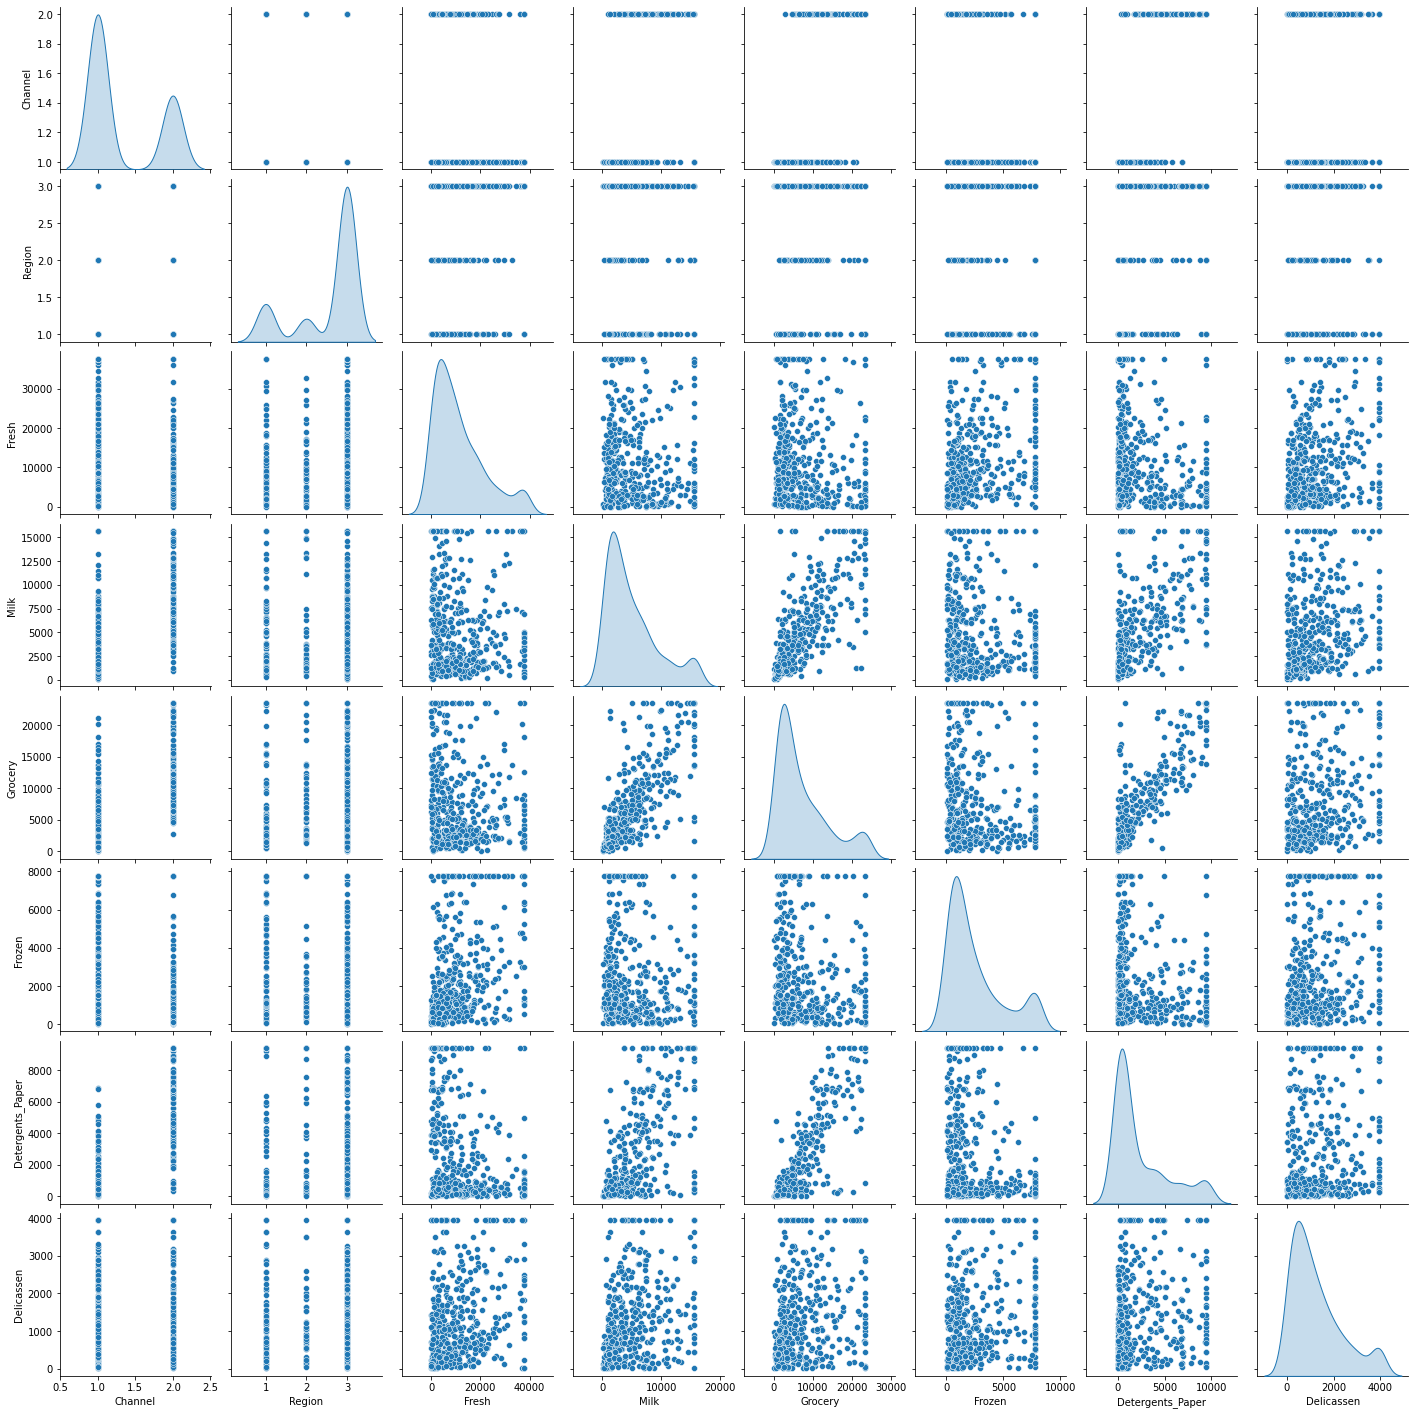

In [15]:
sns.pairplot(customer_data_capped_outlier, kind='scatter', diag_kind='kde')
plt.show()

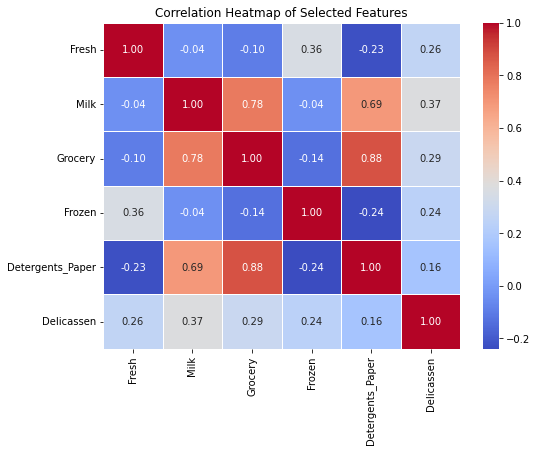

In [17]:
# Select specific columns and calculate correlation
selected_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
correlation_matrix = customer_data_capped_outlier[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

<h4 style="color: blue;">Observation:</h4>

- There is a strong positive correlation between **'Milk'** and **'Grocery'** **(0.781)** and between **'Grocery'** and **'Detergents_Paper'** **(0.877)**.
- Additionally, **'Milk'** and **'Detergents_Paper'** have a correlation of **0.691**.
- These strong correlations imply that stores or customers purchasing milk are likely also purchasing grocery items and detergents, possibly due to complementary purchasing behavior.
- The low correlation between 'Fresh' and other products, along with the modest correlation between **'Fresh'** and **'Frozen'** **(0.355)**, suggests that fresh and frozen products are purchased independently of other categories. 
- This may be due to different storage and usage needs (perishable vs. non-perishable).

## Modeling

In this analysis, I am applying three different clustering algorithms—**K-Means**, **Hierarchical Clustering**, and **DBSCAN**—to explore and categorize the data. 

In [19]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#### Scaling the data

In [20]:
customer_data_capped_outlier.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

Since the 'Region' and 'Channel' columns contain discrete values, including them may distort our visualizations and clustering results. Therefore, I will drop these columns to improve the analysis.

In [23]:
customer_data_capped_outlier = customer_data_capped_outlier.drop(['Channel', 'Region'], axis=1)

In [24]:
X=customer_data_capped_outlier.iloc[::].values
print(X.shape)
X

(440, 6)


array([[12669.   ,  9656.   ,  7561.   ,   214.   ,  2674.   ,  1338.   ],
       [ 7057.   ,  9810.   ,  9568.   ,  1762.   ,  3293.   ,  1776.   ],
       [ 6353.   ,  8808.   ,  7684.   ,  2405.   ,  3516.   ,  3938.25 ],
       ...,
       [14531.   , 15488.   , 23409.875,   437.   ,  9419.875,  1867.   ],
       [10290.   ,  1981.   ,  2232.   ,  1038.   ,   168.   ,  2125.   ],
       [ 2787.   ,  1698.   ,  2510.   ,    65.   ,   477.   ,    52.   ]])

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#### Elbow Method

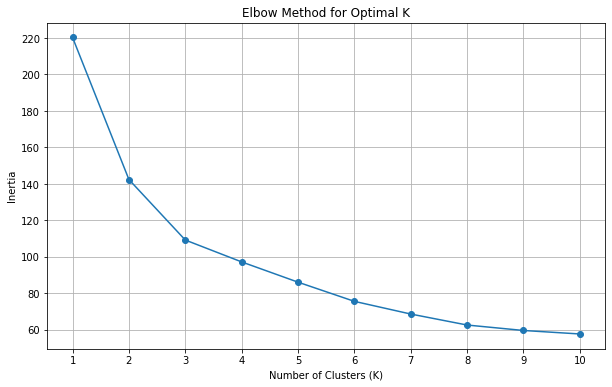

In [26]:
# List to hold the inertia values
inertia = []

# Range of clusters to try
cluster_range = range(1, 11)

# Fit KMeans for different cluster sizes
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()


#### Silhouette Method

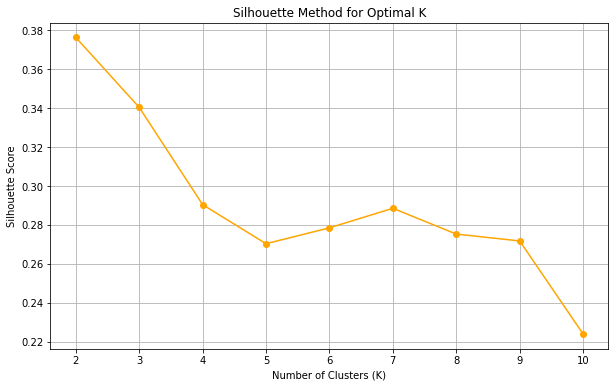

In [28]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in cluster_range[1:]:  # Start from 2 since silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range[1:], silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range[1:])
plt.grid()
plt.show()

#### k-means

In [29]:
# Assuming you have already scaled your data and have 'scaled_data'
kmeans = KMeans(n_clusters=3, random_state=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the original DataFrame for visualization
customer_data_capped_outlier['Cluster'] = cluster_labels

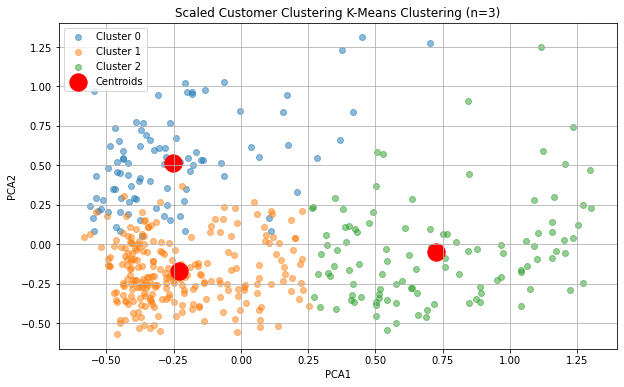

In [35]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=reduced_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Plotting
plt.figure(figsize=(10, 6))
for cluster in range(3):  # Assuming cluster labels are 0, 1, 2
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['PCA1'],
                pca_df[pca_df['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}', alpha=0.5)

# Plotting centroids
centroids = kmeans.cluster_centers_
reduced_centroids = pca.transform(centroids)
plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], s=300, c='red', label='Centroids', marker='o')

plt.title('Scaled Customer Clustering K-Means Clustering (n=3)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.show()

#### Observations
K-Means Clustering

- The data is segmented into three clusters, each represented by distinct colors, with centroids shown in red.
- The clusters are well-separated, indicating that the K-means algorithm has successfully identified groupings within the customer data.
- Cluster 0 (blue) seems to represent customers with a particular spending pattern that differs from those in Cluster 1 (orange) and Cluster 2 (green). The distinct location of centroids suggests different purchasing behaviors among the clusters.

#### Hierarchical Clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Adding cluster labels to the original DataFrame for visualization
customer_data_capped_outlier['Hierarchical_Cluster'] = hierarchical_labels


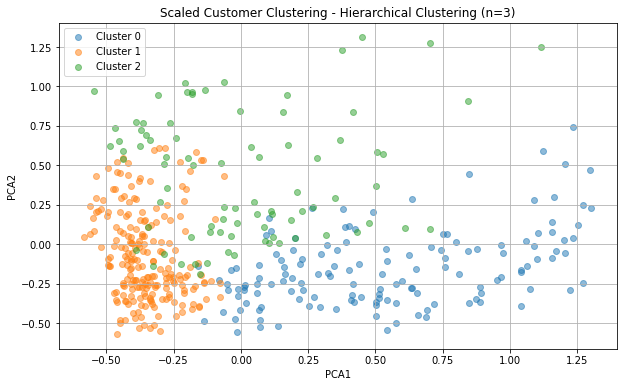

In [37]:
# Reduce to 2 dimensions using PCA
reduced_data_hierarchical = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df_hierarchical = pd.DataFrame(data=reduced_data_hierarchical, columns=['PCA1', 'PCA2'])
pca_df_hierarchical['Hierarchical_Cluster'] = hierarchical_labels

# Plotting
plt.figure(figsize=(10, 6))
for cluster in range(3):  # Assuming cluster labels are 0, 1, 2
    plt.scatter(pca_df_hierarchical[pca_df_hierarchical['Hierarchical_Cluster'] == cluster]['PCA1'],
                pca_df_hierarchical[pca_df_hierarchical['Hierarchical_Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}', alpha=0.5)

# Since hierarchical clustering does not have centroids, we don't plot centroids here.
plt.title('Scaled Customer Clustering - Hierarchical Clustering (n=3)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.show()

#### Observations:
- The hierarchical clustering also identified three clusters, which align well with the separation seen in the K-means clustering.
- Without centroids, it relies on a different grouping mechanism, but the clusters appear similar to those from K-means, indicating consistency between methods.
- There might be slight differences in cluster boundaries compared to K-means, but overall, the clusters are similarly positioned.

#### DBScan

In [38]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as necessary
dbscan_labels = dbscan.fit_predict(X_scaled)

# Adding cluster labels to the original DataFrame for visualization
customer_data_capped_outlier['DBSCAN_Cluster'] = dbscan_labels

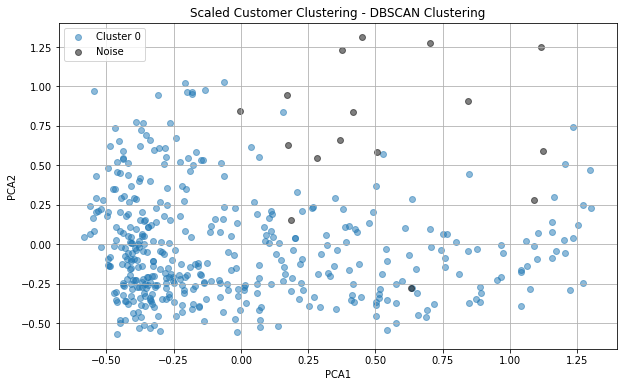

In [39]:
# Reduce to 2 dimensions using PCA
reduced_data_dbscan = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df_dbscan = pd.DataFrame(data=reduced_data_dbscan, columns=['PCA1', 'PCA2'])
pca_df_dbscan['DBSCAN_Cluster'] = dbscan_labels

# Plotting
plt.figure(figsize=(10, 6))

# Plot points; label -1 as noise points
for cluster in set(dbscan_labels):  # Iterate over unique cluster labels
    if cluster == -1:
        # Noise points
        plt.scatter(pca_df_dbscan[pca_df_dbscan['DBSCAN_Cluster'] == cluster]['PCA1'],
                    pca_df_dbscan[pca_df_dbscan['DBSCAN_Cluster'] == cluster]['PCA2'],
                    label='Noise', c='black', alpha=0.5)
    else:
        plt.scatter(pca_df_dbscan[pca_df_dbscan['DBSCAN_Cluster'] == cluster]['PCA1'],
                    pca_df_dbscan[pca_df_dbscan['DBSCAN_Cluster'] == cluster]['PCA2'],
                    label=f'Cluster {cluster}', alpha=0.5)

plt.title('Scaled Customer Clustering - DBSCAN Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.show()

#### Observations
- Single Cluster with Noise: DBSCAN only identified one main cluster, while many other points were labeled as noise. This indicates that the chosen parameters (eps and min_samples) did not capture the density structure of the data well.
- Lack of Density-Based Clusters: The data may lack distinct density-based clusters or may be more spread out, making it difficult for DBSCAN to find dense regions.
- Sensitivity to Parameter Selection: DBSCAN’s sensitivity to eps and min_samples parameters is evident here. If these parameters are not carefully tuned, DBSCAN might classify too many points as noise or fail to form distinct clusters.

### Buisness Recommendations
Targeted Marketing and Promotions: Based on K-means and hierarchical clusters:

- High-spending Cluster: Offer loyalty rewards, premium product options, or exclusive services to retain these valuable customers.
- Medium-spending Cluster: Consider promotions, product bundles, or cross-selling tactics to increase engagement.
- Low-spending Cluster: Focus on discount offers or value-based products to encourage more frequent purchases.